<a href="https://colab.research.google.com/github/LW068/holbertonschool-gan/blob/main/dcgan/HolbertonSchool_DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DCGAN PROJECT (TASK 0)**

## **SETUP AND DATASET**

###**All needed imports:**

In [ ]:
# General Libraries
import tensorflow as tf # for model building and traning
import numpy as np # for data preprocessing and manipulation
import matplotlib.pyplot as plt # for visualization and debugging

# Keras Layers for Generator and Discriminator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Reshape, UpSampling2D, Conv2D, Conv2DTranspose, BatchNormalization, LeakyReLU, Flatten, Input

# Additional Utilities
!pip install wandb
import wandb  # for Weights and Biases

**Downloading MNIST dataset:**

In [ ]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


**Preprocessing MNIST dataset:**

In [ ]:
# Normalize the images to [-1, 1]
train_images = (train_images - 127.5) / 127.5

# Expand dimensions to fit the Conv2D layer input shape (num_samples, 28, 28, 1)
train_images = np.expand_dims(train_images, axis=-1)


## **BASELINE DCGAN**

###**Implementing Baseline DCGAN Architecture:**

**Designing the Generator:**

---

*The generator takes a random noise vector as input and produces an image. It usually consists of a series of transposed convolutional layers.*

In [ ]:
# Initialize the generator model
generator = Sequential()

# Fully connected layer
generator.add(Dense(128*7*7, input_shape=(100,), activation='relu'))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))

# Upsampling layers and convolutional layers
generator.add(UpSampling2D())
generator.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
generator.add(BatchNormalization())
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
generator.add(BatchNormalization())
generator.add(Conv2D(1, kernel_size=3, padding='same', activation='tanh'))  # Output layer

generator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6272)              633472    
                                                                 
 batch_normalization_7 (Bat  (None, 6272)              25088     
 chNormalization)                                                
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 batch_normalization_8 (Bat  (None, 14, 14, 128)      

**Designing the Descriminator:**


---

*The discriminator is a binary classifier that distinguishes between real and fake images.*

In [ ]:
# Initialize the discriminator model
discriminator = Sequential()

# Convolutional layers
discriminator.add(Conv2D(64, kernel_size=3, strides=2, padding='same', input_shape=(28, 28, 1)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())
discriminator.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())

# Fully connected layer
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_10 (Ba  (None, 14, 14, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 batch_normalization_11 (Ba  (None, 7, 7, 128)         512       
 tchNormalization)                                    

**Compile the Models:**

---

*Compile both the generator and discriminator models. This is so I can build the GAN model.*

In [ ]:
# Compile the discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Compile the GAN model
discriminator.trainable = False  # freeze the discriminator when training the GAN
gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

###**Training the Baseline DCGAN on the MNIST Dataset:**

**Generate and Display Sample Images:**

---

*This function is used to visualize the performance of the generator at different stages of the training process. It generates a grid of images using random noise and the current state of the generator.*

In [ ]:
def sample_image(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator.predict(noise)

    # Rescale images from [-1, 1] to [0, 1]
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()


**Training the DCGAN: Generator and Discriminator:**

---

*The following loop contains the main training loop where both the generator and discriminator are trained alternately. Real images are sourced from the MNIST dataset, and fake images are generated using the current state of the generator. Started with 10,000 epochs but was taking too long so I droped it to 1,000 epochs*

4/4 [==============================] - 0s 4ms/step
0 [D loss: 2.771039021354227e-06] [G loss: 5.298454284667969]
1/1 [==============================] - 0s 19ms/step


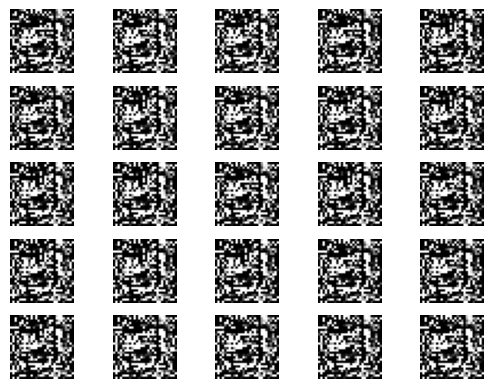

4/4 [==============================] - 0s 5ms/step
100 [D loss: 1.6890411984604725e-06] [G loss: 3.158015251159668]
1/1 [==============================] - 0s 17ms/step


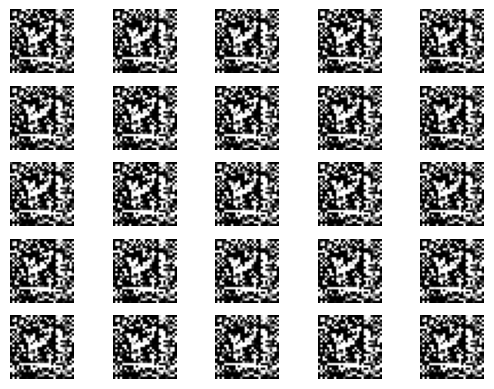

4/4 [==============================] - 0s 5ms/step
200 [D loss: 8.275077902908379e-07] [G loss: 2.0728673934936523]
1/1 [==============================] - 0s 32ms/step


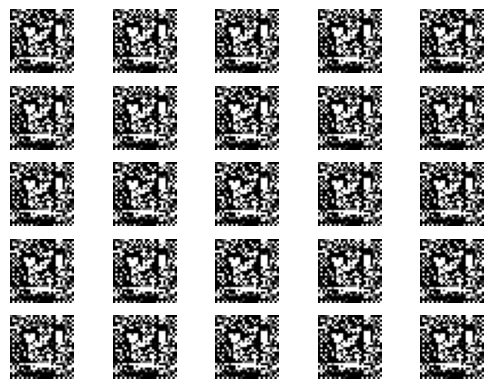

4/4 [==============================] - 0s 5ms/step
300 [D loss: 2.053344132946222e-06] [G loss: 2.2801520824432373]
1/1 [==============================] - 0s 16ms/step


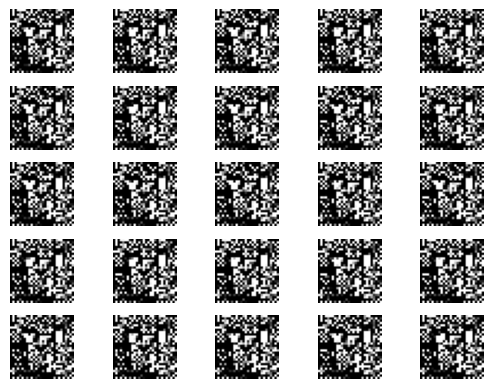

4/4 [==============================] - 0s 4ms/step
400 [D loss: 8.452946076431544e-07] [G loss: 2.8186802864074707]
1/1 [==============================] - 0s 17ms/step


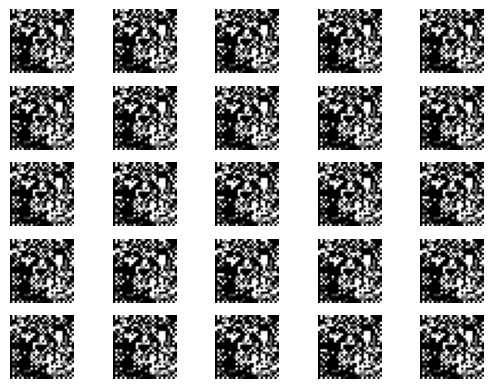

4/4 [==============================] - 0s 4ms/step
500 [D loss: 6.277287241118756e-07] [G loss: 2.8587865829467773]
1/1 [==============================] - 0s 36ms/step


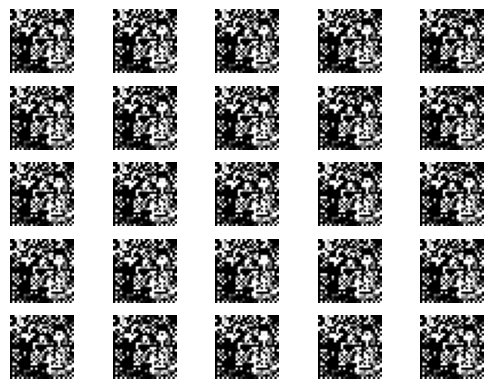

4/4 [==============================] - 0s 6ms/step
600 [D loss: 1.2805061260223738e-06] [G loss: 2.811645984649658]
1/1 [==============================] - 0s 17ms/step


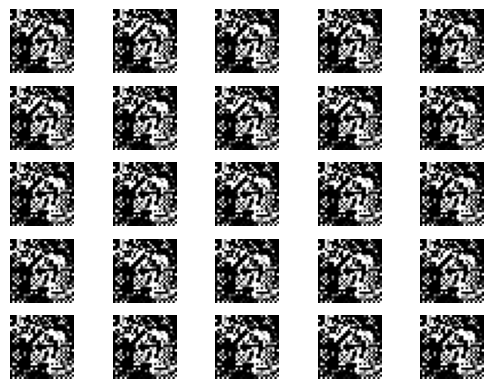

4/4 [==============================] - 0s 6ms/step
700 [D loss: 7.49239404740365e-07] [G loss: 1.6681338548660278]
1/1 [==============================] - 0s 18ms/step


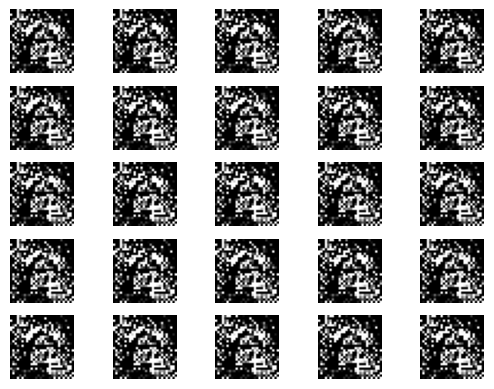

4/4 [==============================] - 0s 6ms/step
800 [D loss: 1.0771075267257402e-06] [G loss: 1.9475573301315308]
1/1 [==============================] - 0s 46ms/step


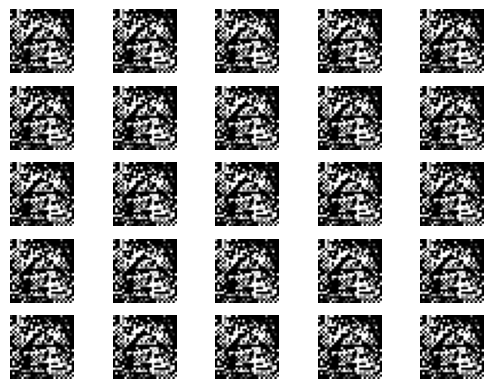

4/4 [==============================] - 0s 6ms/step
900 [D loss: 7.289394829967932e-07] [G loss: 2.1346793174743652]
1/1 [==============================] - 0s 16ms/step


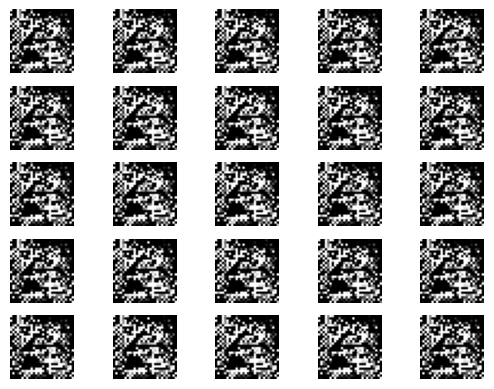

4/4 [==============================] - 0s 6ms/step


In [ ]:
# Number of epochs and batch size
epochs = 1000
batch_size = 128

# Create labels for real and fake data
real_labels = np.ones((batch_size, 1))
fake_labels = np.zeros((batch_size, 1))

for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, train_images.shape[0], batch_size)
    real_imgs = train_images[idx]

    noise = np.random.normal(0, 1, (batch_size, 100))
    fake_imgs = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, real_labels)

    # Print losses and save generated image at intervals
    if epoch % 100 == 0:
        print(f"{epoch} [D loss: {d_loss[0]}] [G loss: {g_loss}]")
        sample_image(epoch)

## **Baseline DCGAN Model**

---

**Discriminator Architecture**
- Layers: 2 Convolutional Layers + 1 Fully Connected Layer
- Filters: Conv1 - 64, Conv2 - 128
- Strides: Conv1 - (2, 2), Conv2 - (2, 2)

---

**Generator Architecture**
- Layers: 1 Fully Connected Layer + 3 Convolutional Layers + 2 Upsampling Layers
- Filters: Conv1 - 128, Conv2 - 64, Conv3 - 1
- Upsampling: Two layers with factor (2, 2)

---

**Training Details**
- Epochs: 1000
- Discriminator Final Loss: 0.0000007289394829967932
- Generator Final Loss: 2.135

---

**Training Notes**
- The "Discriminator Final Loss" value being close to zero, indicates that the descriminator is very confident in its classifications.
- The "Generator Final Loss" suggests that the generator is still trying to fool the discriminator but isn't as effective as I might like.

# **Experiment 1: Architecture Variations**

---

*In this experiment, we will modify the existing DCGAN architecture to observe how these changes affect the model's performance. We'll change the number of layers, filter sizes, and strides in the Generator and Discriminator.*

---

### **Modifications:**

- Increased the number of layers in the Generator and Discriminator.
- Changed the filter size from 32 to 64 in the first Conv2D layer for both the Generator and Discriminator.
- Modified the stride from 2 to 1 in the second Conv2D layer for the Generator.

## **Modified Generator Code:**

In [ ]:
# Initialize the Generator
generator = Sequential()

# Fully connected layer
generator.add(Dense(128 * 7 * 7, activation='relu', input_shape=(100,)))
generator.add(Reshape((7, 7, 128)))

# Convolutional layers
generator.add(Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'))
generator.add(Conv2DTranspose(64, kernel_size=3, strides=1, padding='same'))
generator.add(Conv2DTranspose(1, kernel_size=3, strides=2, activation='tanh', padding='same'))

# Compile the Generator
generator.compile(loss='binary_crossentropy', optimizer='adam')

## **Modified Discriminator Code:**

In [ ]:
# Initialize the Discriminator
discriminator = Sequential()

# Convolutional layers
discriminator.add(Conv2D(64, kernel_size=3, strides=2, input_shape=(28, 28, 1), padding='same'))
discriminator.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))

# Fully connected layer
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

# Compile the Discriminator
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

##**Re-loading Dataset:**

---

*Due to a notbeook restart the previously loaded data was cleared from the memory, so I need to reload the dataset.*

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (_, _) = mnist.load_data()
train_images = (train_images.astype(np.float32) - 127.5) / 127.5  # Normalize the images to [-1, 1]
train_images = np.expand_dims(train_images, axis=-1)  # Add channel dimension

11490434/11490434 [==============================] - 1s 0us/step


##**Traning Modified DCGAN:**

---

*I'm training the modified DCGAN for the same number of epochs and batch size as the baseline model to make a fair comparison.*

In [ ]:
# Number of epochs and batch size
epochs = 1000
batch_size = 128

# Create labels for real and fake data
real_labels = np.ones((batch_size, 1))
fake_labels = np.zeros((batch_size, 1))

# Initialize lists to store losses for plotting later
d_losses_exp1 = []
g_losses_exp1 = []

for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, train_images.shape[0], batch_size)
    real_imgs = train_images[idx]

    noise = np.random.normal(0, 1, (batch_size, 100))
    fake_imgs = modified_generator.predict(noise)

    d_loss_real = modified_discriminator.train_on_batch(real_imgs, real_labels)
    d_loss_fake = modified_discriminator.train_on_batch(fake_imgs, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = modified_gan.train_on_batch(noise, real_labels)

    # Save losses for plotting
    d_losses_exp1.append(d_loss[0])
    g_losses_exp1.append(g_loss)

    # Print losses and save generated image at intervals
    if epoch % 100 == 0:
        print(f"{epoch} [D loss: {d_loss[0]}] [G loss: {g_loss}]")
        sample_image(epoch, model=modified_generator, experiment_name="experiment_1")


NameError: ignored